# Exploratory Data Analysis

#### 1. More feature engineering and selection

In [1]:
import numpy as np
import pandas as pd

In [2]:
feature_pickle = 'C:\\Users\\Sean\\Documents\\BitTiger\\Capston_music_player_python\\features_and_label.pkl'
df = pd.read_pickle(feature_pickle)
df.head()

,uid,device,major_song_type,total_play_time,popular_songs_ratio,play_time_label,avg_play_time,least_popular_count,most_popular_count,count_play_1,count_play_3,count_play_7,count_play_14,count_play_23,label
0,533817,ar,0,1.557662e+07,0.191024,10k+,11355.430927,262.0,23236.0,3070.0,10630.0,26138.0,50456.0,82304.0,0
1,751824,ar,1,3.848332e+07,0.173797,10k+,323888.268341,422.0,1866.0,0.0,0.0,1692.0,7129.0,7129.0,0
2,924065,ar,0,5.289638e+06,0.136762,10k+,10662.084456,8.0,8691.0,522.0,792.0,2256.0,24824.0,29767.0,0
3,1342999,ar,0,6.639750e+03,0.222527,6k-7k,99.496753,2.0,1479.0,552.0,746.0,1318.0,2773.0,4004.0,0
4,1620163,ar,1,4.837500e+02,0.097222,400-500,80.625000,2.0,51.0,0.0,0.0,62.0,155.0,360.0,0


In [3]:
log_pickle = 'C:\\Users\\Sean\\Documents\\BitTiger\\Capston_music_player_python\\reduced_play_log.pkl'
df_play_log = pd.read_pickle(log_pickle)
df_play_log.head()

,index,uid,device,song_id,song_type,play_time,song_length,file_name,date,label
0,0,168551323,ar,16889394,0,93.0,93.0,20170330_3_play.log,20170330,1
1,1,168542680,ar,g214344,1,284.0,285.0,20170330_3_play.log,20170330,0
2,2,168551542,ar,9423272,0,120.0,232.0,20170330_3_play.log,20170330,1
3,3,168549948,ar,23082492,0,205.0,318.0,20170330_3_play.log,20170330,1
4,4,168551120,ar,22858485,0,119.0,233.0,20170330_3_play.log,20170330,1


    I. Completion ratio: play_time / song_length 

In [4]:
# completion ratio of each song playing activity
df_play_log['play_ratio'] = df_play_log.play_time / df_play_log.song_length
df_play_log['play_ratio'] = df_play_log['play_ratio'].apply(abs)
df_play_log.head()

,index,uid,device,song_id,song_type,play_time,song_length,file_name,date,label,play_ratio
0,0,168551323,ar,16889394,0,93.0,93.0,20170330_3_play.log,20170330,1,1.000000
1,1,168542680,ar,g214344,1,284.0,285.0,20170330_3_play.log,20170330,0,0.996491
2,2,168551542,ar,9423272,0,120.0,232.0,20170330_3_play.log,20170330,1,0.517241
3,3,168549948,ar,23082492,0,205.0,318.0,20170330_3_play.log,20170330,1,0.644654
4,4,168551120,ar,22858485,0,119.0,233.0,20170330_3_play.log,20170330,1,0.510730


In [5]:
df_play_log.loc[(df_play_log.song_length == 0) |(df_play_log.song_length == 0.0), 'play_ratio'] = 1
df_play_log.head()

,index,uid,device,song_id,song_type,play_time,song_length,file_name,date,label,play_ratio
0,0,168551323,ar,16889394,0,93.0,93.0,20170330_3_play.log,20170330,1,1.000000
1,1,168542680,ar,g214344,1,284.0,285.0,20170330_3_play.log,20170330,0,0.996491
2,2,168551542,ar,9423272,0,120.0,232.0,20170330_3_play.log,20170330,1,0.517241
3,3,168549948,ar,23082492,0,205.0,318.0,20170330_3_play.log,20170330,1,0.644654
4,4,168551120,ar,22858485,0,119.0,233.0,20170330_3_play.log,20170330,1,0.510730


In [6]:
# a proof that defining complete ratio = 1 is valid for song_length ==0
df_play_log.loc[(df_play_log.song_length==0) | (df_play_log.song_length==0.0)].label.mean()

0.31491647115357435

In [7]:
# in the play log level, replay over 1000 times is a clear sign of churn
df_play_log.loc[(df_play_log.play_ratio<1000)].label.mean(),df_play_log.loc[(df_play_log.play_ratio>1000)].label.mean()

(0.308468480499908, 0.7059296590177997)

In [8]:
# in the user level
df['avg_complete_ratio'] = list(df_play_log.groupby('uid').mean()['play_ratio'])
df.head()

,uid,device,major_song_type,total_play_time,popular_songs_ratio,play_time_label,avg_play_time,least_popular_count,most_popular_count,count_play_1,count_play_3,count_play_7,count_play_14,count_play_23,label,avg_complete_ratio
0,533817,ar,0,1.557662e+07,0.191024,10k+,11355.430927,262.0,23236.0,3070.0,10630.0,26138.0,50456.0,82304.0,0,16.084027
1,751824,ar,1,3.848332e+07,0.173797,10k+,323888.268341,422.0,1866.0,0.0,0.0,1692.0,7129.0,7129.0,0,213066.662423
2,924065,ar,0,5.289638e+06,0.136762,10k+,10662.084456,8.0,8691.0,522.0,792.0,2256.0,24824.0,29767.0,0,32.965740
3,1342999,ar,0,6.639750e+03,0.222527,6k-7k,99.496753,2.0,1479.0,552.0,746.0,1318.0,2773.0,4004.0,0,0.576672
4,1620163,ar,1,4.837500e+02,0.097222,400-500,80.625000,2.0,51.0,0.0,0.0,62.0,155.0,360.0,0,0.409754


In [9]:
df.loc[df.avg_complete_ratio<1.2].label.mean(), df.loc[df.avg_complete_ratio>=1.2].label.mean()

(0.49977859184412865, 0.7135036496350365)

    II. ratio_n_over_23： count_play_n / count_play_23
    
    This indicates how active a user is near the cutoff date

In [10]:
# creation of new column names
columns = ['count_play_1','count_play_3','count_play_7','count_play_14','count_play_23']
for i in range(len(columns)-1):
        print 'ratio_%s_over_%s' % (columns[i].split('_')[-1],columns[len(columns)-1].split('_')[-1])

ratio_1_over_23
ratio_3_over_23
ratio_7_over_23
ratio_14_over_23


In [11]:
for i in range(len(columns)-1):
        new_col =  'ratio_%s_over_%s' % (columns[i].split('_')[-1],columns[len(columns)-1].split('_')[-1])
        df[new_col] = df[columns[i]].astype(float) / df[columns[len(columns)-1]]

df.head()

,uid,device,major_song_type,total_play_time,popular_songs_ratio,play_time_label,avg_play_time,least_popular_count,most_popular_count,count_play_1,...,count_play_7,count_play_14,count_play_23,label,avg_complete_ratio,ratio_1_over_23,ratio_3_over_23,ratio_7_over_23,ratio_14_over_23,ratio_23_over_23
0,533817,ar,0,1.557662e+07,0.191024,10k+,11355.430927,262.0,23236.0,3070.0,...,26138.0,50456.0,82304.0,0,16.084027,0.037301,0.129155,0.317579,0.613044,1.0
1,751824,ar,1,3.848332e+07,0.173797,10k+,323888.268341,422.0,1866.0,0.0,...,1692.0,7129.0,7129.0,0,213066.662423,0.000000,0.000000,0.237340,1.000000,1.0
2,924065,ar,0,5.289638e+06,0.136762,10k+,10662.084456,8.0,8691.0,522.0,...,2256.0,24824.0,29767.0,0,32.965740,0.017536,0.026607,0.075789,0.833944,1.0
3,1342999,ar,0,6.639750e+03,0.222527,6k-7k,99.496753,2.0,1479.0,552.0,...,1318.0,2773.0,4004.0,0,0.576672,0.137862,0.186314,0.329171,0.692557,1.0
4,1620163,ar,1,4.837500e+02,0.097222,400-500,80.625000,2.0,51.0,0.0,...,62.0,155.0,360.0,0,0.409754,0.000000,0.000000,0.172222,0.430556,1.0


In [12]:
# a quick check of churn rate
df.loc[(df['ratio_7_over_23']<0.1)].label.mean()

0.7543926298793807

    III. active_days: days when a user had at least one activity
    
    This might take off the influence of the outliers, who play huge amount of songs each day

In [29]:
df_daily_play = df_play_log.groupby(['uid','date']).size().unstack().fillna(0)
df_daily_play.head()

date,20170330,20170331,20170401,20170402,20170403,20170404,20170405,20170406,20170407,20170408,...,20170412,20170413,20170414,20170415,20170416,20170417,20170418,20170419,20170420,20170421
uid,,,,,,,,,,,,,,,,,,,,,
533817,1347.0,2085.0,2906.0,5169.0,2973.0,4308.0,4748.0,4776.0,3536.0,4280.0,...,3226.0,4332.0,2743.0,4898.0,4186.0,2688.0,3736.0,3520.0,4040.0,3070.0
751824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2592.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1692.0,0.0,0.0,0.0
924065,631.0,258.0,730.0,784.0,340.0,478.0,530.0,530.0,662.0,646.0,...,576.0,662.0,496.0,442.0,292.0,492.0,238.0,94.0,176.0,522.0
1342999,67.0,66.0,313.0,398.0,0.0,58.0,56.0,56.0,217.0,73.0,...,545.0,407.0,151.0,454.0,0.0,55.0,63.0,37.0,157.0,552.0
1620163,196.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,34.0,59.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# if a user had any activity on the days
df_play_log.groupby(['uid','date']).size().unstack().notnull().head()

date,20170330,20170331,20170401,20170402,20170403,20170404,20170405,20170406,20170407,20170408,...,20170412,20170413,20170414,20170415,20170416,20170417,20170418,20170419,20170420,20170421
uid,,,,,,,,,,,,,,,,,,,,,
533817,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
751824,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
924065,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1342999,True,True,True,True,False,True,True,True,True,True,...,True,True,True,True,False,True,True,True,True,True
1620163,True,True,False,False,False,False,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [14]:
df['active_days']= list(df_play_log.groupby(['uid','date']).size().unstack().notnull().sum(axis=1))
df.head()

,uid,device,major_song_type,total_play_time,popular_songs_ratio,play_time_label,avg_play_time,least_popular_count,most_popular_count,count_play_1,...,count_play_14,count_play_23,label,avg_complete_ratio,ratio_1_over_23,ratio_3_over_23,ratio_7_over_23,ratio_14_over_23,ratio_23_over_23,active_days
0,533817,ar,0,1.557662e+07,0.191024,10k+,11355.430927,262.0,23236.0,3070.0,...,50456.0,82304.0,0,16.084027,0.037301,0.129155,0.317579,0.613044,1.0,23
1,751824,ar,1,3.848332e+07,0.173797,10k+,323888.268341,422.0,1866.0,0.0,...,7129.0,7129.0,0,213066.662423,0.000000,0.000000,0.237340,1.000000,1.0,4
2,924065,ar,0,5.289638e+06,0.136762,10k+,10662.084456,8.0,8691.0,522.0,...,24824.0,29767.0,0,32.965740,0.017536,0.026607,0.075789,0.833944,1.0,23
3,1342999,ar,0,6.639750e+03,0.222527,6k-7k,99.496753,2.0,1479.0,552.0,...,2773.0,4004.0,0,0.576672,0.137862,0.186314,0.329171,0.692557,1.0,20
4,1620163,ar,1,4.837500e+02,0.097222,400-500,80.625000,2.0,51.0,0.0,...,155.0,360.0,0,0.409754,0.000000,0.000000,0.172222,0.430556,1.0,5


In [16]:
df.groupby(['active_days','label']).size().unstack()

label,0,1
active_days,,
1,10.0,3.0
2,10.0,3.0
3,20.0,68.0
4,773.0,3154.0
5,766.0,2343.0
6,912.0,1388.0
7,884.0,1280.0
8,832.0,977.0
9,815.0,690.0


In [17]:
df.loc[df.active_days > 8].label.mean(),df.loc[df.active_days <= 8].label.mean()

(0.30001671402306535, 0.6865827311331297)

##### Days since last active

    This is actually the first feature that needs to be figure out for this churn model.
    
    The median or a certain quantile should be used for defining churns.

In [ ]:
df

In [20]:
df_features = df.drop(['total_play_time','count_play_1','count_play_3',\
                       'count_play_7','count_play_14','ratio_23_over_23','label'],axis = 1)
df_features.head()

,uid,device,major_song_type,popular_songs_ratio,play_time_label,avg_play_time,least_popular_count,most_popular_count,count_play_23,avg_complete_ratio,ratio_1_over_23,ratio_3_over_23,ratio_7_over_23,ratio_14_over_23,active_days
0,533817,ar,0,0.191024,10k+,11355.430927,262.0,23236.0,82304.0,16.084027,0.037301,0.129155,0.317579,0.613044,23
1,751824,ar,1,0.173797,10k+,323888.268341,422.0,1866.0,7129.0,213066.662423,0.000000,0.000000,0.237340,1.000000,4
2,924065,ar,0,0.136762,10k+,10662.084456,8.0,8691.0,29767.0,32.965740,0.017536,0.026607,0.075789,0.833944,23
3,1342999,ar,0,0.222527,6k-7k,99.496753,2.0,1479.0,4004.0,0.576672,0.137862,0.186314,0.329171,0.692557,20
4,1620163,ar,1,0.097222,400-500,80.625000,2.0,51.0,360.0,0.409754,0.000000,0.000000,0.172222,0.430556,5


In [26]:
df_features['label'] = df.label
df_features.head()

,uid,device,major_song_type,popular_songs_ratio,play_time_label,avg_play_time,least_popular_count,most_popular_count,count_play_23,avg_complete_ratio,ratio_1_over_23,ratio_3_over_23,ratio_7_over_23,ratio_14_over_23,active_days,label
0,533817,ar,0,0.191024,10k+,11355.430927,262.0,23236.0,82304.0,16.084027,0.037301,0.129155,0.317579,0.613044,23,0
1,751824,ar,1,0.173797,10k+,323888.268341,422.0,1866.0,7129.0,213066.662423,0.000000,0.000000,0.237340,1.000000,4,0
2,924065,ar,0,0.136762,10k+,10662.084456,8.0,8691.0,29767.0,32.965740,0.017536,0.026607,0.075789,0.833944,23,0
3,1342999,ar,0,0.222527,6k-7k,99.496753,2.0,1479.0,4004.0,0.576672,0.137862,0.186314,0.329171,0.692557,20,0
4,1620163,ar,1,0.097222,400-500,80.625000,2.0,51.0,360.0,0.409754,0.000000,0.000000,0.172222,0.430556,5,0


#### EDA

    1. device vs. churn

In [30]:
df_device = df_features.groupby(['device','label']).size().unstack()
df_device

label,0,1
device,,
ar,10081,11238
ip,2502,1568


In [28]:
# churn rate with respect to device
df_features.groupby('device').mean()['label']

device
ar    0.527135
ip    0.385258
Name: label, dtype: float64

In [29]:
import matplotlib.pyplot as plt

% matplotlib inline

plt.style.use('ggplot')

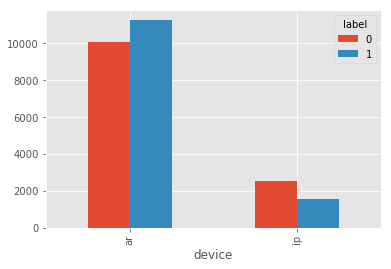

In [34]:
ax = df_device.plot.bar()
plt.show()

    2. Play time vs. Churn

In [36]:
df_play_time = df_features.groupby(['play_time_label','label']).size().unstack()
df_play_time

label,0,1
play_time_label,,
0-100,1429,3816
100-200,1784,2742
10k+,145,374
1k-2k,1866,607
200-300,1370,1559
2k-3k,632,151
300-400,1034,1074
3k-4k,287,61
400-500,906,705


In [37]:
df_play_log.shape

(6458256, 11)

In [38]:
df.shape

(25389, 22)